# Evaluation

reference : https://datascienceplus.com/evaluation-of-topic-modeling-topic-coherence/

In [0]:
import numpy as np
import logging
import json
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array


In [0]:
temp_file = "./conservative_model/ldamodel"
lda_model = LdaModel.load(temp_file)

In [0]:
f = open("final_conserv.txt", 'r', encoding = "UTF8")
# 데이터 받아옴
dataset = []
while True:
    line = f.readline()
    if not line: break
    dataset += [line.split(' ')]
f.close()

dct = Dictionary(dataset)
corpus = [dct.doc2bow(line) for line in dataset]

In [0]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=dataset, dictionary=dct, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Coherence Score:  0.3578639604020303


In [0]:
# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda_model, texts=dataset, dictionary=dct, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

#############################
# 논문 참고해서 다른 모델 정확도랑 비교하기
#http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.662.7267&rep=rep1&type=pdf

# u_mass에 대한 설명
# http://qpleple.com/topic-coherence-to-evaluate-topic-models/
############################


Coherence Score:  -1.4547546652561434


In [0]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [0]:
model_list, coherence_values = compute_coherence_values(dictionary=dct, corpus=corpus, texts=dataset, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

<Figure size 640x480 with 1 Axes>

In [0]:
%matplotlib inline

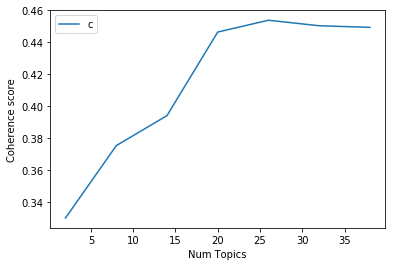

In [0]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()